In [222]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

In [223]:
df = pd.read_csv('spam.csv', encoding='latin1')


In [224]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [225]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


## DATA CLEANING

In [226]:
# Lets drop Unamed2 3 and 4 coloumns 

df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)


In [227]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [228]:
# Null Values
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [229]:
# Renaming the coloumns
df.rename({'v1':"Target",'v2':'Text'}, axis =1, inplace=True)

In [230]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [231]:
# Converting ham and spam into numbers and it is recommended to use labelEncoder from sklearn preprocessing library
# As this process might be timetaking for large data

value2 = []
for value in df.Target:
    if value == "spam":
        value2.append (1)
    else:
        value2.append(0)       
df.Target = value2

In [232]:
df.head(10)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [233]:
# Checking for duplicates
df.duplicated().sum()

np.int64(403)

In [234]:
# Removing the duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

In [235]:
df.shape

(5169, 2)

## EDA

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  5169 non-null   int64 
 1   Text    5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


<Axes: xlabel='Target'>

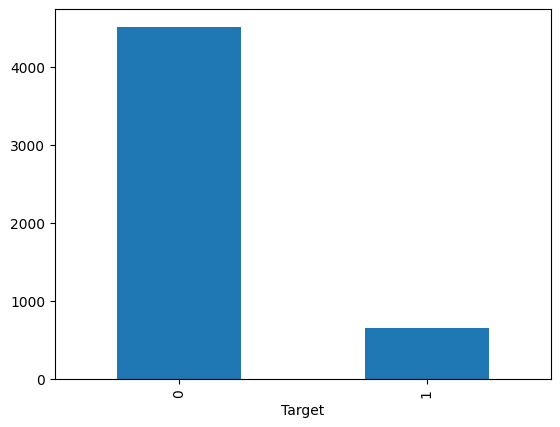

In [237]:
# How many spams and not spam
df['Target'].value_counts().plot(kind="bar")


In [238]:
# Data is imbalance
# Also for deeper undersatnding, we will be making three coloumns, one for words, one for chaarcters and one for sentences. To do this we will be using nltk library

!pip install nltk 

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [239]:
import nltk
df['characters'] = df['Text'].apply(len) # Length of total characters in one email


In [240]:
df.head()

,Target,Text,characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [241]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Hashim
[nltk_data]     Awan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [242]:

#Words
df['words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [243]:

df.head(10)

,Target,Text,characters,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39
6,0,Even my brother is not like to speak with me. ...,77,18
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31
8,1,WINNER!! As a valued network customer you have...,158,32
9,1,Had your mobile 11 months or more? U R entitle...,154,31


In [244]:
df['sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Target,Text,characters,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [245]:
df.describe()

,Target,characters,words,sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


<Axes: xlabel='characters', ylabel='Count'>

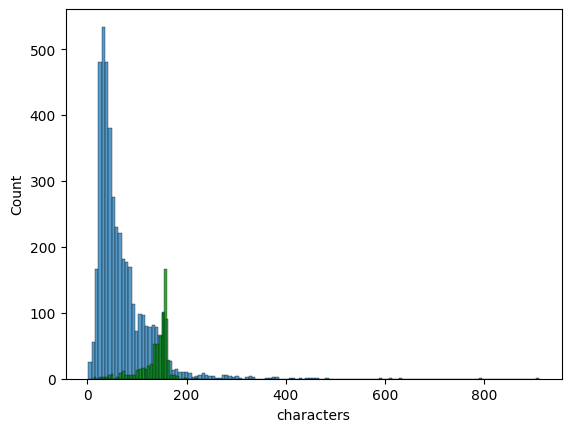

In [246]:
sns.histplot(df[df['Target'] == 0]['characters'])
sns.histplot(df[df['Target'] == 1]['characters'],color='green')

In [247]:
# From above observation we can see that spam messages has more characters then ham messages(---- KEY OBSERVATION).
# You can do same for words and sentences.

<Axes: >

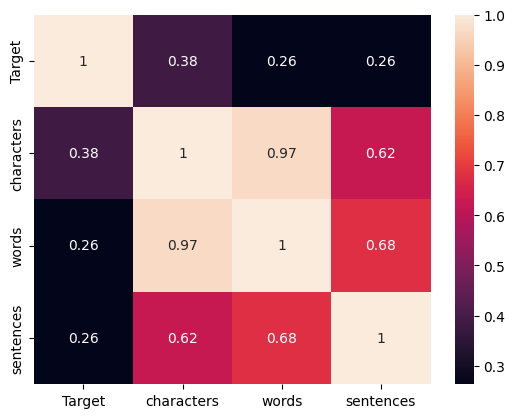

In [248]:
# Let's check the correlation of chars,words,sentences
corr_matrix = df[['Target','characters','words','sentences']].corr()
sns.heatmap(corr_matrix,annot=True)


In [249]:
# From above observation we will be working with characters coloumn

## TEXT PREPARATION

In [250]:
# For stemming now just import
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


# we will be performing
# Tokenization, removing stopwords, punctuation, special characters and conversion into lower words



In [251]:
# Lets create a function that will be performing all this stuff for us
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


def transform_text(text):
    # Converting into Lower Words
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    # For special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    # Copying not by reference and removing stopwrds and punctuation
    text = y[:]
    y.clear()
    

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    # Stemmization i.e. converting into root word
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

[nltk_data] Downloading package stopwords to C:\Users\Hashim
[nltk_data]     Awan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [252]:
df['Transformed_Text'] = df['Text'].apply(transform_text)



In [253]:
df.head()

,Target,Text,characters,words,sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [254]:
# Word Cloud to count the most occuring words in hama nd spam


!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [255]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

spam_wc = wc.generate(df[df['Target'] == 1]['Transformed_Text'].str.cat(sep=" "))


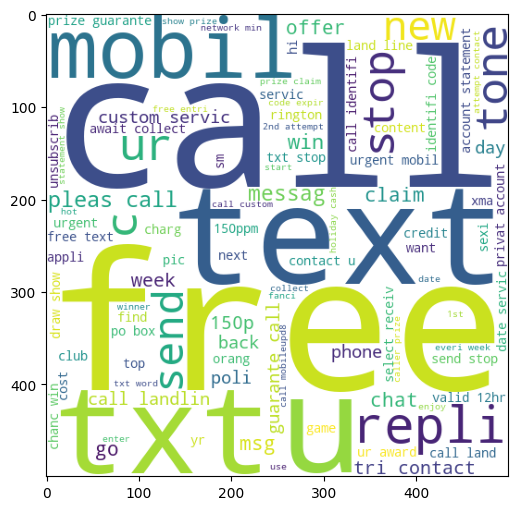

In [256]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
# The following words are frequently used in spam messages.

In [257]:
# Similarly you can check for ham messages.

# Let's find first 30 words... Custom Code

spamWords = []
for msg in df[df['Target'] == 1]['Transformed_Text'].tolist():
    for word in msg.split():
        spamWords.append(word)

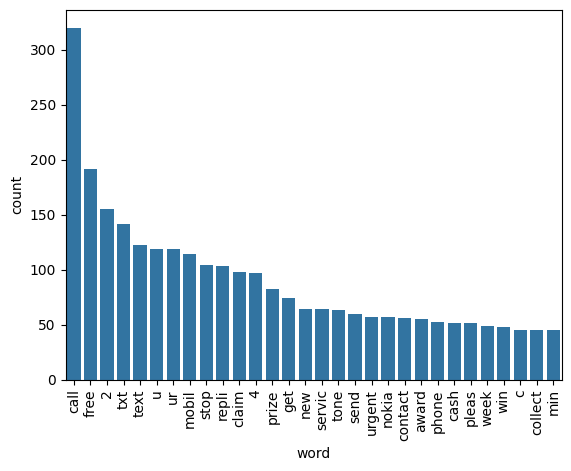

In [258]:
from collections import Counter
common_words = Counter(spamWords).most_common(30)

# Create a DataFrame from the most common words
df_common_words = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot the barplot
sns.barplot(x='word', y='count', data=df_common_words)

# Rotate the x labels vertically
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

In [259]:
# Let's do for ham

hamWords = []
for msg in df[df['Target'] == 0]['Transformed_Text'].tolist():
    for word in msg.split():
        hamWords.append(word)

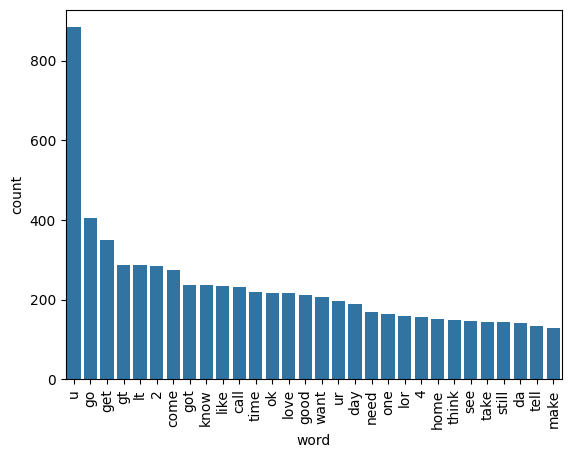

In [260]:

common_words_ham = Counter(hamWords).most_common(30)

# Create a DataFrame from the most common words
df_common_words_ham = pd.DataFrame(common_words_ham, columns=['word', 'count'])

# Plot the barplot
sns.barplot(x='word', y='count', data=df_common_words_ham)

# Rotate the x labels vertically
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

## Model Building

In [293]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Transformed_Text']).toarray()
# Ignore below three cells

In [294]:
y = df['Target'].values

In [295]:
print(X[0])
print(y[2])

[0. 0. 0. ... 0. 0. 0.]
1


In [ ]:
df.head()

,Target,Text,characters,words,sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [296]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40)


In [297]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score



In [298]:
KNC = KNeighborsClassifier()
MNB = MultinomialNB()
lr  = LogisticRegression(solver='liblinear') 

In [299]:
def Train_Classifier(alg,X_train,y_train,X_test,y_test):
    alg.fit(X_train,y_train)
    y_pred = alg.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [300]:
clfs = {
    'LR' : lr,
    'KN' : KNC, 
    'MNB': MNB, 
}

In [290]:
accuracy,current_precision = Train_Classifier(lr, X_train,y_train,X_test,y_test)
    
print("For LR")
print("Accuracy - ",accuracy)
print("Precision - ",current_precision)


For LR
Accuracy -  0.9535783365570599
Precision -  0.9605263157894737


In [301]:
current_accuracy,current_precision = Train_Classifier(KNC, X_train,y_train,X_test,y_test)
    
print("For KNC")
print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)


For KNC
Accuracy -  0.9148936170212766
Precision -  1.0


In [302]:
current_accuracy,current_precision = Train_Classifier(MNB, X_train,y_train,X_test,y_test)
    
print("For Naive bayes")
print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)


For Naive bayes
Accuracy -  0.9671179883945842
Precision -  1.0


In [303]:
# Naive bayes gives some good results

In [304]:
# Lets start deploying our project on heruku

In [305]:
import pickle
pickle.dump(tfidf,open('vectorization.pkl','wb'))
pickle.dump(MNB,open('modelBuilding.pkl','wb'))